In [152]:
import pandas as pd
import time
import matplotlib.pyplot as plt

#df_test = pd.read_csv('Sample_labaled_data.csv')
#tempDf_test = df_test

df = pd.read_csv('cuss_word_samples.csv')
tempDf = df

In [153]:
#print(tempDf_test)

In [154]:
pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

Note: you may need to restart the kernel to use updated packages.


In [155]:
from googleapiclient.discovery import build

import json


def get_toxicity_score(comment):
    
    API_KEY = 'my-api-key'
    
    client = build(
    "commentanalyzer"
    "v1alpha1",
    developerKey=API_KEY,
    discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1",
    static_discovery=False,
    version=2.0,
    )
    
    analyze_request = {
    'comment': {'text' : comment }, 
    'requestedAttributes': {'TOXICITY': {}}
    }
    
    response = client.comments().analyze(body=analyze_request).execute()
    toxicity_score = response["attributeScores"]["TOXICITY"]["summaryScore"]["value"]
    
    return toxicity_score

In [156]:
#pip install langdetect

In [157]:
#from langdetect import detect, LangDetectException

#def is_english(text):
#    if isinstance(text, str):
#        try:
#            return detect(text) == 'en'
#        except LangDetectException:
#           pass
#    return False

#tempDf_test = tempDf_test[tempDf_test['comment_text'].apply(is_english)]


In [158]:
#yes_toxic_df = tempDf_test.loc[tempDf_test['toxic'] == 'yes'].head(30)
#no_toxic_df = tempDf_test.loc[tempDf_test['toxic'] == 'no'].head(30)
# Print the new DataFrame
#print(yes_toxic_df)
#print(no_toxic_df)

In [159]:
#combined_df = pd.concat([yes_toxic_df, no_toxic_df])

# Print the combined DataFrame
#print(combined_df)

In [160]:
#combined_df['scores'] = combined_df['comment_text'].apply(get_toxicity_score)
#print(combined_df)

In [161]:
# Calculate the mean, lower quartile, and upper quartile scores for rows with "no" in the "toxic" column
#no_toxic_mean = combined_df.loc[combined_df["toxic"] == "no", "scores"].mean()
#no_toxic_lower_quartile = combined_df.loc[combined_df["toxic"] == "no", "scores"].quantile(0.25)
#no_toxic_upper_quartile = combined_df.loc[combined_df["toxic"] == "no", "scores"].quantile(0.75)

# Calculate the mean, lower quartile, and upper quartile scores for rows with "yes" in the "toxic" column
#yes_toxic_mean = combined_df.loc[combined_df["toxic"] == "yes", "scores"].mean()
#yes_toxic_lower_quartile = combined_df.loc[combined_df["toxic"] == "yes", "scores"].quantile(0.25)
#yes_toxic_upper_quartile = combined_df.loc[combined_df["toxic"] == "yes", "scores"].quantile(0.75)

# Print the results
#print("No toxic comments:")
#print(" Mean score:", no_toxic_mean)
#print(" Lower quartile:", no_toxic_lower_quartile)
#print(" Upper quartile:", no_toxic_upper_quartile)

#print("\nYes toxic comments:")
#print(" Mean score:", yes_toxic_mean)
#print(" Lower quartile:", yes_toxic_lower_quartile)
#print(" Upper quartile:", yes_toxic_upper_quartile)


In [162]:
tempDf['score'] = tempDf['comment_text'].apply(get_toxicity_score)
#print(tempDf)

In [163]:
import numpy as np

# Define the conditions
conditions = [
    (tempDf['score'] <= 0.1978351225),
    (tempDf['score'] >= 0.642857825),
]

# Define the values for each condition
values = ['no', 'yes']

# Apply the conditions and assign the result to a new column
tempDf['toxic'] = np.select(conditions, values, default='unsure')


In [164]:
print(tempDf)

          Cuss word                                       comment_text  \
0          Positive                                 You are so awesome   
1          Positive                        That was an easy assignment   
2          Positive               The person’s tennis serve is so cool   
3          Positive                           This food tastes so good   
4          Positive                                         I love you   
5          Positive                         your moms food tastes good   
6          Positive        I'll make sure I give you a good experience   
7          Positive                                     That’s to cool   
8          Positive                                       Your awesome   
9          Positive                                               Wow!   
10         Positive               wow i never thought of that. Thanks!   
11         Positive                      you have a good looking butt    
12         Positive                   

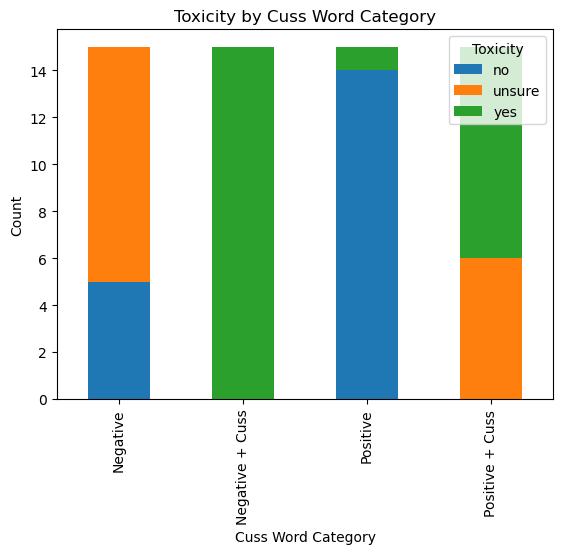

In [165]:
import matplotlib.pyplot as plt

# Group the DataFrame by the 'Cuss word' column and count the values of the 'toxic' column for each group
grouped = tempDf.groupby('Cuss word')['toxic'].value_counts().unstack()

# Plot a bar graph for each group
grouped.plot(kind='bar', stacked=True)

# Add labels and a legend to the plot
plt.title('Toxicity by Cuss Word Category')
plt.xlabel('Cuss Word Category')
plt.ylabel('Count')
plt.legend(title='Toxicity', loc='upper right')

# Show the plot
plt.show()
